# Assignment

## Instructions

### Text Classification for Spam Detection

In this assignment, you will build a text classification model using Naive Bayes to classify SMS messages as spam or ham (non-spam). You will implement text preprocessing techniques and use the Vector Space Model (TF-IDF) to represent the text data.

#### Dataset

You will be using the SMS Spam Collection dataset, which contains a set of SMS messages that have been labeled as either spam or ham (legitimate). This dataset is available through several Python libraries or can be downloaded directly.

#### Tasks

1. **Text Preprocessing**:

   - Load the dataset
   - Implement tokenization
   - Apply stemming or lemmatization
   - Remove stopwords

2. **Feature Extraction**:

   - Use TF-IDF vectorization to convert the text data into numerical features
   - Explore the most important features for spam and ham categories

3. **Classification**:

   - Split the data into training and testing sets
   - Train a Multinomial Naive Bayes classifier
   - Evaluate the model using appropriate metrics (accuracy, precision, recall, F1-score)
   - Create a confusion matrix to visualize the results

4. **Analysis**:
   - Analyze false positives and false negatives
   - Identify characteristics of messages that are frequently misclassified
   - Suggest improvements to your model

#### Starter Code

[nltk_data] Downloading package punkt to /home/sharondev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sharondev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64

Processed examples:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Processed: go jurong point crazi avail bugi n great world la e buffet cine got amor wat

Original: Ok lar... Joking wif u oni...
Processed: ok lar joke wif u oni

Original: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Processed: free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt rate

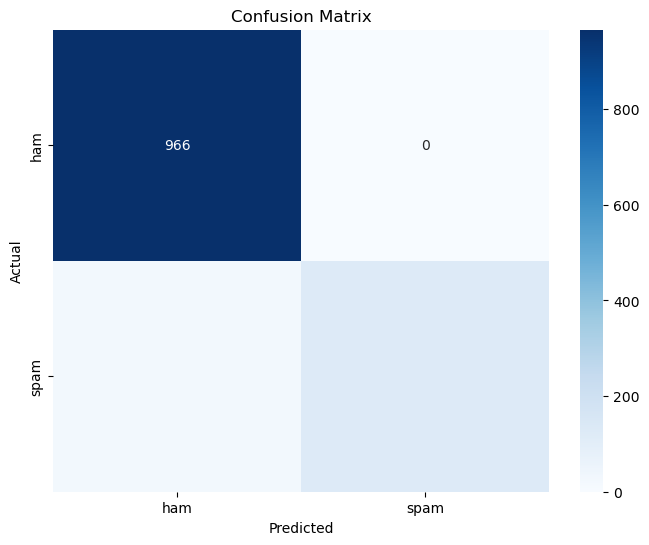


Top features for spam:
call: -5.1839
free: -5.4879
txt: -5.8348
mobil: -5.8473
text: -5.9327
claim: -5.9517
stop: -5.9687
repli: -6.0021
ur: -6.1043
prize: -6.1749
servic: -6.2652
tone: -6.2939
new: -6.2954
award: -6.3206
urgent: -6.3773
send: -6.4388
nokia: -6.4463
cash: -6.4495
win: -6.4664
contact: -6.4901

Top features for ham:
im: -5.1565
ok: -5.1614
go: -5.2644
get: -5.3501
come: -5.3708
call: -5.4502
ill: -5.4738
ltgt: -5.6054
dont: -5.6543
got: -5.6691
time: -5.6961
good: -5.7001
know: -5.7054
like: -5.7365
later: -5.7797
home: -5.7824
want: -5.8258
sorri: -5.8269
ur: -5.8429
love: -5.8572

Misclassified Messages:
Message: Reminder: You have not downloaded the content you have already paid for. Goto http://doit. mymoby. tv/ to collect your content.
Actual: spam, Predicted: ham

Message: Guess what! Somebody you know secretly fancies you! Wanna find out who it is? Give us a call on 09065394973 from Landline DATEBox1282EssexCM61XN 150p/min 18
Actual: spam, Predicted: ham

Messag

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import urllib.request
import re
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the SMS Spam Collection dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
urllib.request.urlretrieve(url, "sms.tsv")
sms_data = pd.read_csv('sms.tsv', sep='\t', names =['label', 'message'])
print(sms_data.head())

# Check data distribution
print(sms_data['label'].value_counts())

# Text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)

# Apply preprocessing to the SMS messages
sms_data['processed_text'] = sms_data['message'].apply(preprocess_text)

# Display a few processed examples
print("\nProcessed examples:")
for i in range(5):
    print(f"Original: {sms_data['message'][i]}")
    print(f"Processed: {sms_data['processed_text'][i]}")
    print()

# Convert label to binary (0 for 'ham', 1 for 'spam')
sms_data['label_binary'] = sms_data['label'].map({'ham': 0, 'spam': 1})

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(sms_data['processed_text'])
y = sms_data['label_binary']

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Multinomial Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Make predictions
y_pred = naive_bayes.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Get the most important features for each class
def get_top_features(vectorizer, classifier, class_label, n=20):
    feature_names = vectorizer.get_feature_names_out()
    coefs_with_features = sorted(zip(classifier.feature_log_prob_[class_label], feature_names))
    top = coefs_with_features[-n:]
    return top

# Top features for spam
top_spam_features = get_top_features(tfidf_vectorizer, naive_bayes, 1)
print("\nTop features for spam:")
for feature in reversed(top_spam_features):
    print(f"{feature[1]}: {feature[0]:.4f}")

# Top features for ham
top_ham_features = get_top_features(tfidf_vectorizer, naive_bayes, 0)
print("\nTop features for ham:")
for feature in reversed(top_ham_features):
    print(f"{feature[1]}: {feature[0]:.4f}")

# Analyze misclassifications
misclassified_indices = np.where(y_test != y_pred)[0]

print("\nMisclassified Messages:")
for i in misclassified_indices[:10]:  # Show first 10 misclassifications
    actual_label = 'spam' if y_test.iloc[i] == 1 else 'ham'
    predicted_label = 'spam' if y_pred[i] == 1 else 'ham'

    print(f"Message: {sms_data['message'].iloc[y_test.index[i]]}")
    print(f"Actual: {actual_label}, Predicted: {predicted_label}")
    print()

# Analysis of false positives and false negatives
false_positives = np.where((y_test == 0) & (y_pred == 1))[0]
false_negatives = np.where((y_test == 1) & (y_pred == 0))[0]

print(f"Number of false positives (ham classified as spam): {len(false_positives)}")
print(f"Number of false negatives (spam classified as ham): {len(false_negatives)}")

# Improvement suggestions
print("\nSuggested Improvements:")
print("1. Try different preprocessing techniques, such as using lemmatization instead of stemming.")
print("2. Experiment with n-grams instead of just single words to capture phrase context.")
print("3. Use more advanced models like SVM or ensemble methods.")
print("4. Apply hyperparameter tuning to optimize model performance.")
print("5. Implement a weighted classification approach since the dataset is imbalanced.")

## Submission

- Submit the URL of the GitHub Repository that contains your work to NTU black board.
- Should you reference the work of your classmate(s) or online resources, give them credit by adding either the name of your classmate or URL.